In [2]:
import os
import h5py as h5
import numpy as np
import nrrd
import matplotlib.pyplot as plt

In [3]:
file_seg = "/Volumes/LaCie/scratch/160_10-layer/labels/00/subvolumes/160_10-layer_0055_prediction24_02_05.seg.nrrd"
file_raw = "/Volumes/LaCie/scratch/160_10-layer/labels/00/subvolumes/160_10-layer_0055.nrrd"

file_ref = "/Volumes/LaCie/scratch/160_10-layer/volumes/"

assert os.path.exists(file_raw)
assert os.path.exists(file_seg)

In [4]:
raw, header_raw = nrrd.read(file_raw)
seg, header_seg = nrrd.read(file_seg)

In [5]:
print(raw.shape,seg.shape)

(500, 230, 230) (500, 230, 230)


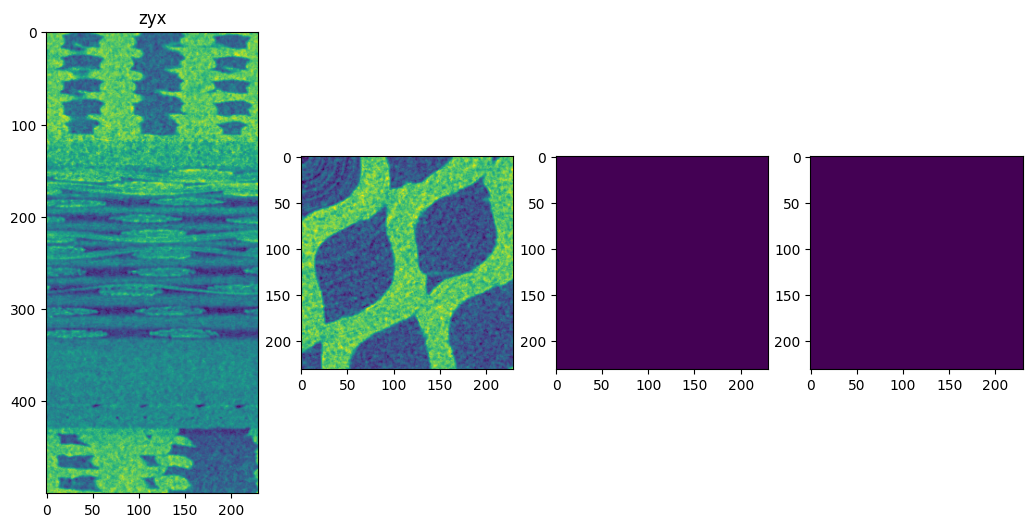

In [24]:
raw_out = raw.transpose(2,0,1)
seg_out = seg.transpose(2,0,1)
fileout = "160_10-layer_0055_xzy.seg.h5"


fig, axs = plt.subplots(1,4,figsize=(2*6.3,6.3))

axs = axs.flatten()


obj_ids = np.unique(seg_out)
obj_ids = obj_ids[0:]
segC_out = seg_out == obj_ids[:, None, None, None]



slice =-1
axs[0].imshow(raw[:,slice,:])
axs[0].set_title("zyx")
axs[1].imshow(raw_out[:,slice,:])
axs[2].imshow(seg_out[:,slice,:])
axs[3].imshow(segC_out[2,:,slice,:])

out = {}

out["raw"] = raw_out
out["labels"] = seg_out
out["masks"] = segC_out


with h5.File(fileout,"w") as f:
    for key in out.keys():
        f.create_dataset(key, data = out[key])


